In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from utilities import convert_price_to_binary

In [5]:
data = pd.read_csv('sp500_sentiment_non_weighted.csv')
data = data.drop(columns=['Unnamed: 0', 'Volume'],axis=1)
data['Price_change'] = data['Price_change'].apply(convert_price_to_binary)
data['Price_change'] = data['Price_change'].astype(int)
data.head()

,date,Close,Positive,Negative,Neutral,Price_change
0,2011-01-04,1270.199951,0.064300,0.176204,0.759496,-1
1,2011-01-05,1276.560059,0.070152,0.115202,0.814645,1
2,2011-01-06,1273.849976,0.220425,0.023661,0.755914,1
3,2011-01-07,1271.500000,0.056488,0.152407,0.791105,-1
4,2011-01-10,1269.750000,0.036662,0.274360,0.688978,-1


## Train-Test Split

In [6]:
X = np.array(data[['Positive', 'Negative', 'Neutral']])
y = np.array(data['Price_change'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  shuffle=True, random_state=42, stratify=y)

print(f"Train data shapes X: {X_train.shape} , y: {y_train.shape}")
print(f"Test data shapes X : {X_test.shape}  , y: {y_test.shape}")

Train data shapes X: (1766, 3) , y: (1766,)
Test data shapes X : (589, 3)  , y: (589,)


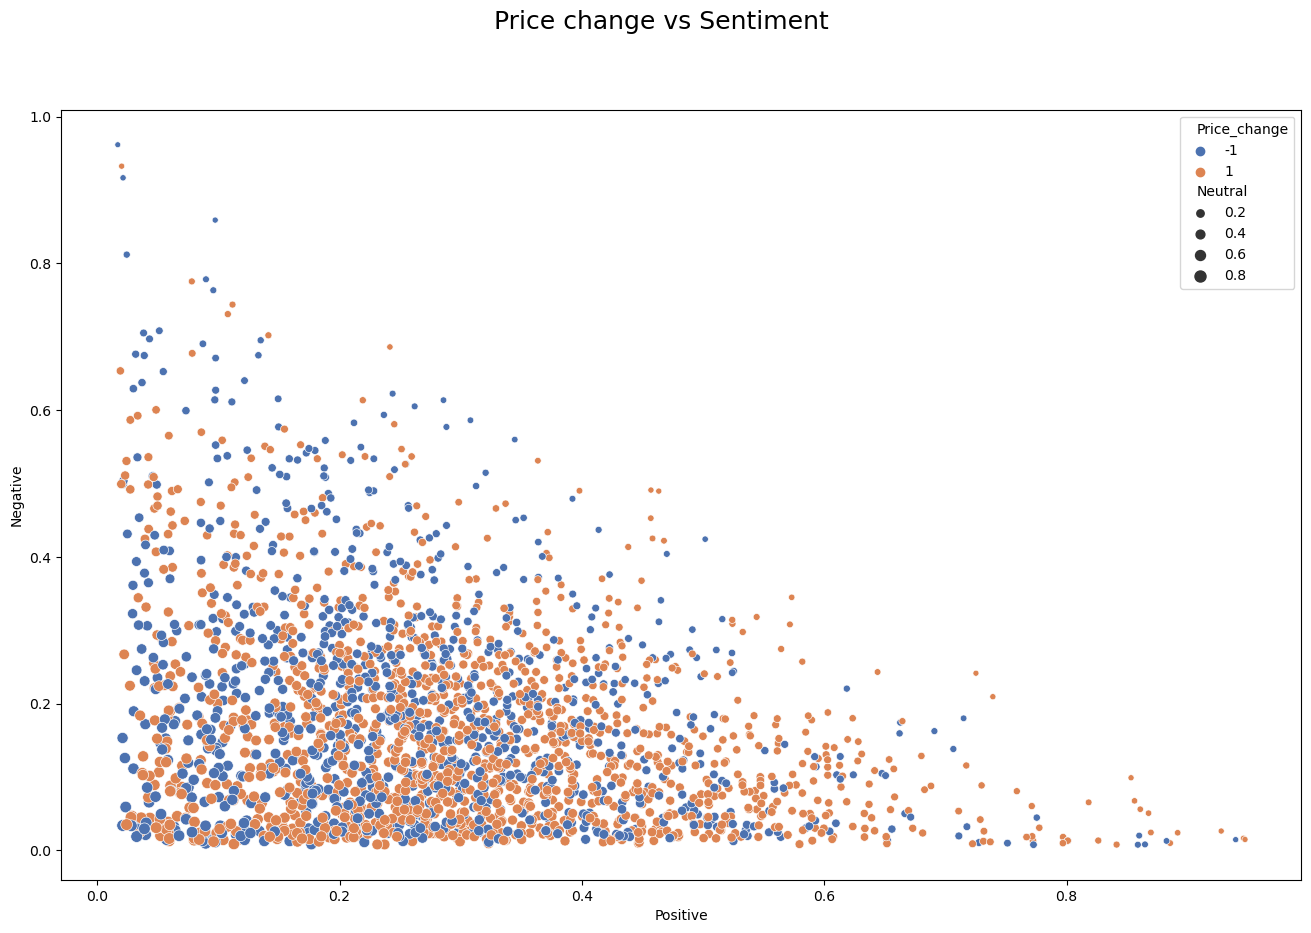

In [7]:
fig , ax = plt.subplots(figsize=(16,10))
fig.suptitle("Price change vs Sentiment", fontsize=18)
sns.scatterplot(data=data, x="Positive", y="Negative", size='Neutral', palette="deep", hue = 'Price_change')
plt.show()

## Scoring

In [11]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'f1' : make_scorer(f1_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

## Logistic Regression

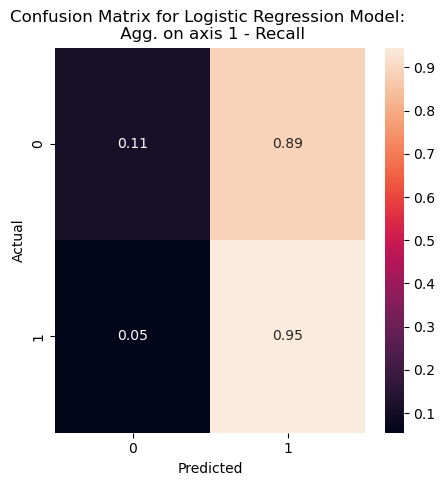

Mean accuracy : 59.46%
Mean f1_score : 72.94%
Mean precision: 60.39%
Mean recall   : 92.08%


In [33]:
lr_model = LogisticRegression(penalty='l2')
lr_model.fit(X_train, y_train)

cv_scores = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
f1 = cv_scores['test_f1'].mean()
prec = cv_scores['test_precision'].mean()
recall = cv_scores['test_recall'].mean()
  
predictions = lr_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=lr_model.classes_)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cmn, annot=True, fmt='.2f')
plt.title('Confusion Matrix for Logistic Regression Model: \n Agg. on axis 1 - Recall')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

print("Mean accuracy : {:.2f}%".format(accs*100))
print("Mean f1_score : {:.2f}%".format(f1*100))
print("Mean precision: {:.2f}%".format(prec*100))
print("Mean recall   : {:.2f}%".format(recall*100))

## SVM

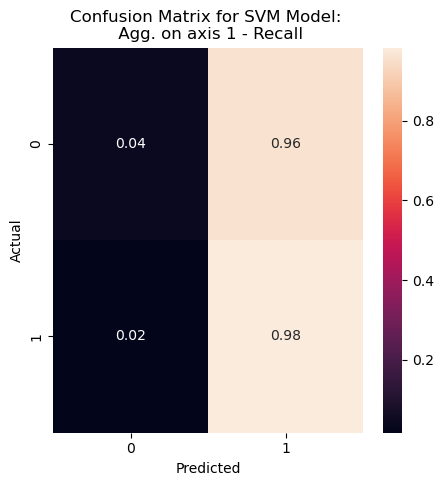

Mean accuracy : 60.70%
Mean f1_score : 74.58%
Mean precision: 60.52%
Mean recall   : 97.14%


In [37]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

cv_scores = cross_validate(svm_model, X_train, y_train, cv=5, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
f1 = cv_scores['test_f1'].mean()
prec = cv_scores['test_precision'].mean()
recall = cv_scores['test_recall'].mean()

  
predictions = svm_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=svm_model.classes_)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cmn, annot=True, fmt='.2f')
plt.title('Confusion Matrix for SVM Model: \n Agg. on axis 1 - Recall')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

print("Mean accuracy : {:.2f}%".format(accs*100))
print("Mean f1_score : {:.2f}%".format(f1*100))
print("Mean precision: {:.2f}%".format(prec*100))
print("Mean recall   : {:.2f}%".format(recall*100))

## Random Forect Classifier

---------------------------------------------
Random Forest with criterion  entropy ,  nodes = 2


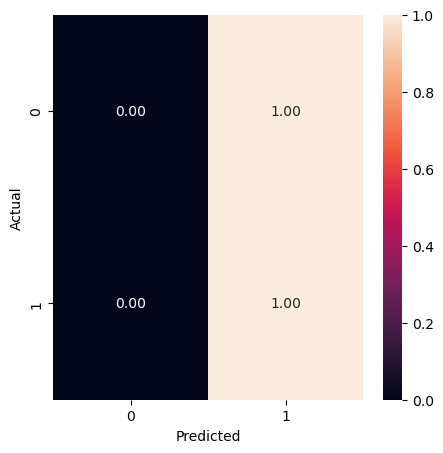

Mean accuracy : 59.41%
Mean f1_score : 74.45%
Mean precision: 59.40%
Mean recall   : 99.71%
---------------------------------------------
Random Forest with criterion  entropy ,  nodes = 3


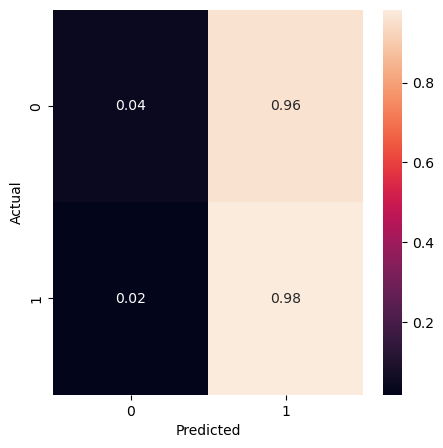

Mean accuracy : 58.90%
Mean f1_score : 73.66%
Mean precision: 59.41%
Mean recall   : 96.92%
---------------------------------------------
Random Forest with criterion  entropy ,  nodes = 5


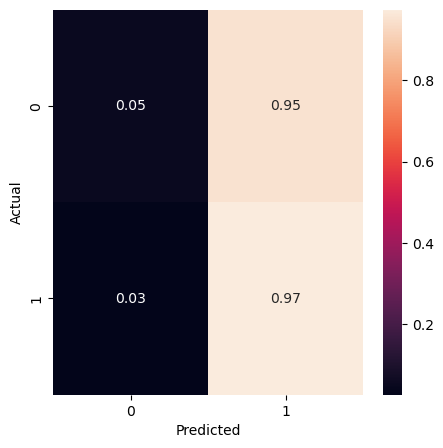

Mean accuracy : 59.28%
Mean f1_score : 73.62%
Mean precision: 59.77%
Mean recall   : 95.85%
---------------------------------------------
Random Forest with criterion  entropy ,  nodes = 7


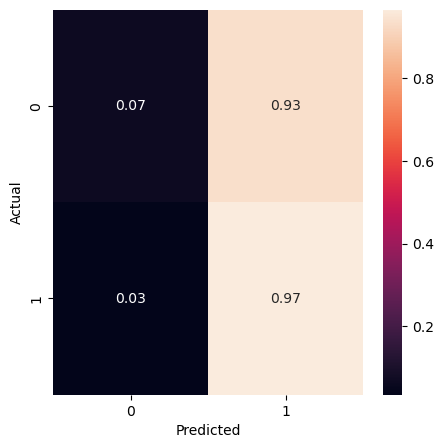

Mean accuracy : 58.94%
Mean f1_score : 73.07%
Mean precision: 59.76%
Mean recall   : 94.06%
---------------------------------------------
Random Forest with criterion  entropy ,  nodes = 10


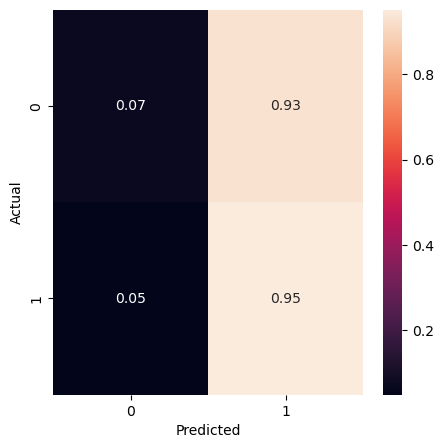

Mean accuracy : 59.15%
Mean f1_score : 73.11%
Mean precision: 59.95%
Mean recall   : 93.70%
---------------------------------------------
Random Forest with criterion  entropy ,  nodes = 22


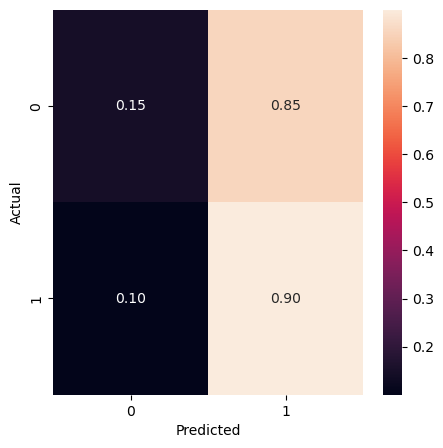

Mean accuracy : 58.13%
Mean f1_score : 71.64%
Mean precision: 59.85%
Mean recall   : 89.26%
---------------------------------------------
Random Forest with criterion  entropy ,  nodes = 50


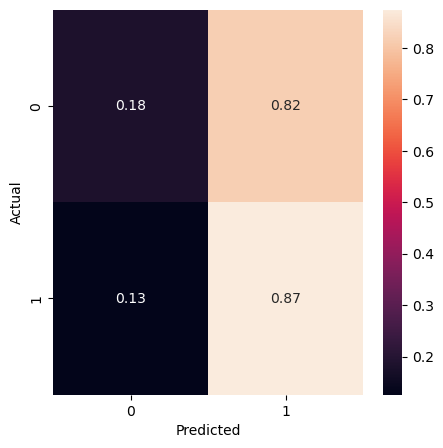

Mean accuracy : 58.73%
Mean f1_score : 71.34%
Mean precision: 60.63%
Mean recall   : 86.68%
---------------------------------------------
Random Forest with criterion  gini ,  nodes = 2


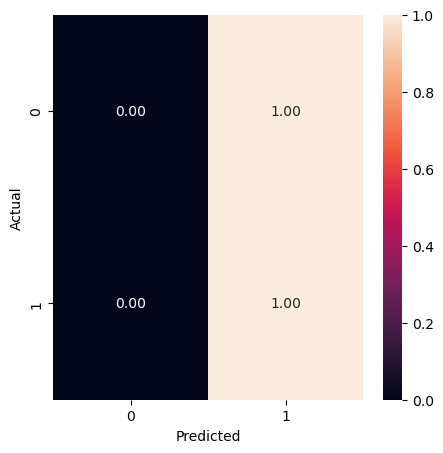

Mean accuracy : 59.36%
Mean f1_score : 74.49%
Mean precision: 59.35%
Mean recall   : 100.00%
---------------------------------------------
Random Forest with criterion  gini ,  nodes = 3


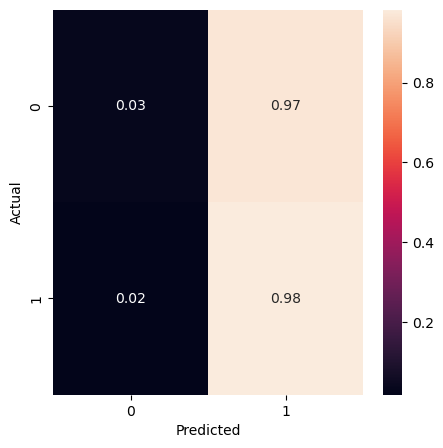

Mean accuracy : 59.24%
Mean f1_score : 74.06%
Mean precision: 59.48%
Mean recall   : 98.14%
---------------------------------------------
Random Forest with criterion  gini ,  nodes = 5


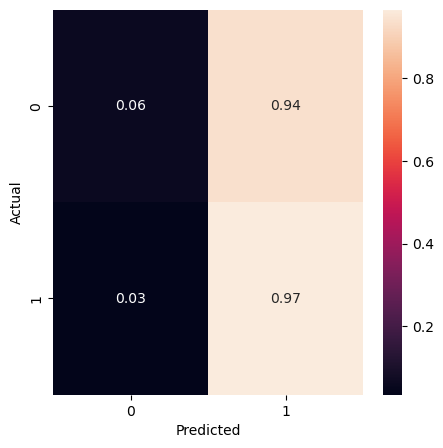

Mean accuracy : 58.90%
Mean f1_score : 73.30%
Mean precision: 59.60%
Mean recall   : 95.20%
---------------------------------------------
Random Forest with criterion  gini ,  nodes = 7


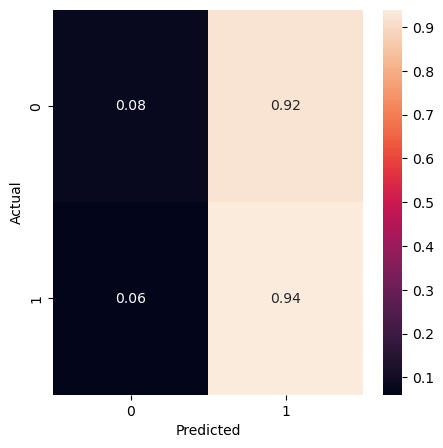

Mean accuracy : 58.90%
Mean f1_score : 72.79%
Mean precision: 59.89%
Mean recall   : 92.84%
---------------------------------------------
Random Forest with criterion  gini ,  nodes = 10


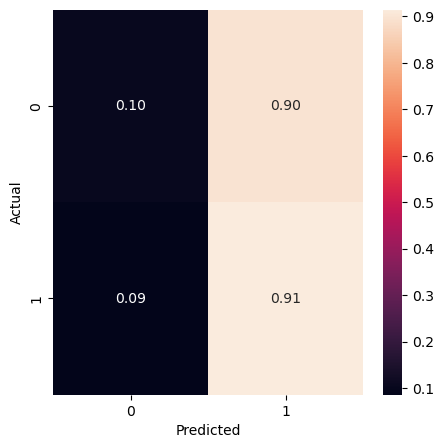

Mean accuracy : 59.45%
Mean f1_score : 72.90%
Mean precision: 60.36%
Mean recall   : 92.05%
---------------------------------------------
Random Forest with criterion  gini ,  nodes = 22


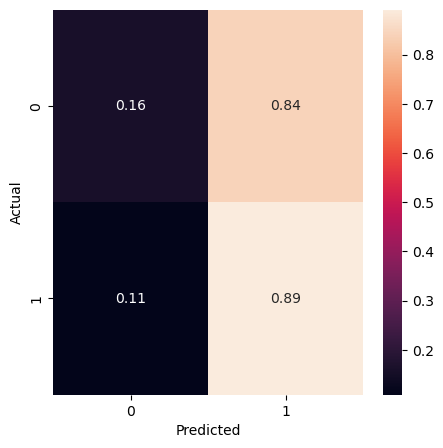

Mean accuracy : 59.19%
Mean f1_score : 71.92%
Mean precision: 60.73%
Mean recall   : 88.19%
---------------------------------------------
Random Forest with criterion  gini ,  nodes = 50


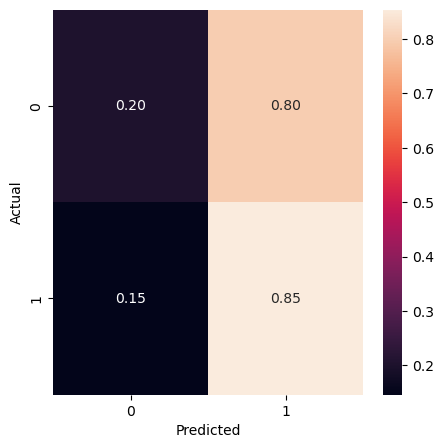

Mean accuracy : 58.13%
Mean f1_score : 70.40%
Mean precision: 60.62%
Mean recall   : 83.96%


In [41]:
for criterion in ['entropy', 'gini'] :
    for leafs in [2, 3, 5, 7, 10, 22, 50] :
        print("---------"*5)
        print("Random Forest with criterion ", criterion, ",  nodes =",leafs)

        rf_model = RandomForestClassifier(criterion=criterion, max_leaf_nodes=leafs)
        rf_model.fit(X_train, y_train)

         # Cross 5 fold validation
        cv_scores = cross_validate(rf_model, X, y, cv=5, scoring=scoring)
        accs = cv_scores['test_accuracy'].mean()
        f1 = cv_scores['test_f1'].mean()
        prec = cv_scores['test_precision'].mean()
        recall = cv_scores['test_recall'].mean()
        
        # Confusion Matrix
        predictions = rf_model.predict(X_test)
        cm = confusion_matrix(y_test, predictions, labels=rf_model.classes_)
        # Normalise
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fig, ax = plt.subplots(figsize=(5,5))

        sns.heatmap(cmn, annot=True, fmt='.2f')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show(block=False)
        
        print("Mean accuracy : {:.2f}%".format(accs*100))
        print("Mean f1_score : {:.2f}%".format(f1*100))
        print("Mean precision: {:.2f}%".format(prec*100))
        print("Mean recall   : {:.2f}%".format(recall*100))